# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

OVERERALL Anaylsis of Dataset:

1. Based on the data, the further you are from lat 0 degrees (equator) the colder you get. The closer you are to lat 0 degrees the warmer you are. The data suggest that lat has a dirrect relationship with temperature.

2. Based on the data, most of the southern hemisphere data suggest there is no correlation to lattitude. Temperature data looks colder. I would suggest adding more southern hemisphere countries to really anylze this correlation.

3. All the data suggest that lat does not have a direct impact on humidity, cloudiness and windspeed. This is clear throughout both hemispheres. 

In [1]:
#pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url=f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

response = requests.get(query_url + "City").json()
response



http://api.openweathermap.org/data/2.5/weather?appid=999fb85742e96c699338def4a2ba44db&units=metric&q=


{'coord': {'lon': 149.1292, 'lat': -35.2813},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 8.67,
  'feels_like': 7.65,
  'temp_min': 7.78,
  'temp_max': 9.44,
  'pressure': 1009,
  'humidity': 100},
 'visibility': 10000,
 'wind': {'speed': 1.03, 'deg': 130},
 'clouds': {'all': 0},
 'dt': 1614889490,
 'sys': {'type': 1,
  'id': 9588,
  'country': 'AU',
  'sunrise': 1614887620,
  'sunset': 1614933405},
 'timezone': 39600,
 'id': 2172517,
 'name': 'City',
 'cod': 200}

In [5]:
data = []
counter = 0

#For loop
for city in cities:
    counter=counter+1
    
    try:
        response = requests.get(query_url + city ).json()
        temp_max= response["main"]["temp_max"]
        humidity=response["main"]["humidity"]
        windspeed=response["wind"]["speed"]
        cloudy=response["clouds"]["all"]
        country=response["sys"]["country"]
        date=response["dt"]
        lat=response["coord"]["lat"]
        lon=response["coord"]["lon"]
        data.append([date,city, country, lat, lon, temp_max, humidity,windspeed, cloudy])
        print(f"{counter} {city}")
        time.sleep(.2)
    except:
        print("City not found.")      

  
print("------------------------------\nData Retrieval Complete\n------------------------------")


1 ushuaia
2 busselton
3 hermanus
4 cape town
5 road town
6 chapais
7 sao filipe
8 bucak
9 gladstone
10 anshun
11 albany
12 balkhash
13 atuona
14 arraial do cabo
15 severo-kurilsk
16 butaritari
City not found.
18 rikitea
19 maceio
20 nikolayevsk-na-amure
City not found.
22 saint george
23 port-gentil
24 mutoko
25 hobart
26 olafsvik
27 cobija
28 port hedland
29 okhotsk
30 guaymas
31 la ronge
32 yulara
33 puerto ayora
34 kyshtovka
35 punta arenas
36 bluff
37 faanui
38 mumford
39 lavrentiya
40 vaini
41 port elizabeth
42 mataura
43 port alfred
44 kalabo
45 alofi
46 luzilandia
47 tasiilaq
48 la romana
49 zharkent
50 vanderhoof
51 samarai
52 taltal
53 gondanglegi
54 qinzhou
55 san patricio
City not found.
57 hasaki
58 hilo
59 mindelo
60 castro
61 jamestown
62 carutapera
63 tuktoyaktuk
64 guarapari
65 grand gaube
66 nouadhibou
City not found.
68 namibe
69 new norfolk
70 khatanga
City not found.
72 nikolskoye
73 lepe
City not found.
75 pangnirtung
76 dourbali
77 rawson
78 chuy
79 bethel
80 mand

618 krasnoselkup
619 arlit
620 tual
621 labuhan
622 bow island
623 kimbe
624 purwa
625 padang
626 cockburn town
627 rassvet
City not found.
629 bolivar
630 urucui
631 santa isabel
632 mapiripan
633 bima
634 nanakuli
635 bonfim
636 pisz
637 broome
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df = pd.DataFrame(data,columns=["date","city", "country", "lat", "lon", "temp_max", "humidity","windspeed", "cloudy"])
city_df

,date,city,country,lat,lon,temp_max,humidity,windspeed,cloudy
0,1614889334,ushuaia,AR,-54.8000,-68.3000,15.00,51,1.03,40
1,1614889493,busselton,AU,-33.6500,115.3333,18.89,99,3.26,81
2,1614889511,hermanus,ZA,-34.4187,19.2345,15.00,91,2.61,82
3,1614889511,cape town,ZA,-33.9258,18.4232,19.44,63,5.66,0
4,1614889419,road town,VG,18.4167,-64.6167,27.22,69,3.09,20
...,...,...,...,...,...,...,...,...,...
587,1614889724,bima,ID,-8.4667,118.7167,24.30,84,0.57,100
588,1614889725,nanakuli,US,21.3906,-158.1547,25.00,53,3.09,1
589,1614889726,bonfim,BR,3.0833,-59.9500,34.69,36,3.75,87
590,1614889726,pisz,PL,53.6274,21.8125,-1.00,93,3.09,0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
highhumidity = city_df[(city_df["humidity"]>100)].index
highhumidity

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

cleancity_df=city_df.drop(highhumidity, inplace=False)
cleancity_df


,date,city,country,lat,lon,temp_max,humidity,windspeed,cloudy
0,1614889334,ushuaia,AR,-54.8000,-68.3000,15.00,51,1.03,40
1,1614889493,busselton,AU,-33.6500,115.3333,18.89,99,3.26,81
2,1614889511,hermanus,ZA,-34.4187,19.2345,15.00,91,2.61,82
3,1614889511,cape town,ZA,-33.9258,18.4232,19.44,63,5.66,0
4,1614889419,road town,VG,18.4167,-64.6167,27.22,69,3.09,20
...,...,...,...,...,...,...,...,...,...
587,1614889724,bima,ID,-8.4667,118.7167,24.30,84,0.57,100
588,1614889725,nanakuli,US,21.3906,-158.1547,25.00,53,3.09,1
589,1614889726,bonfim,BR,3.0833,-59.9500,34.69,36,3.75,87
590,1614889726,pisz,PL,53.6274,21.8125,-1.00,93,3.09,0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

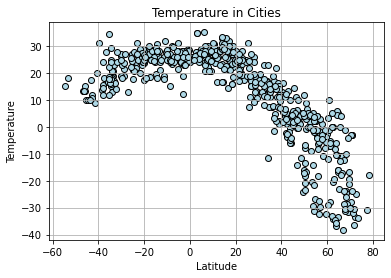

In [9]:
plt.scatter(cleancity_df["lat"],cleancity_df["temp_max"], marker="o", color="lightblue",edgecolor="black")
plt.title("Temperature in Cities")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

#printpng
plt.savefig("Temp_in_cities.png")

## Latitude vs. Humidity Plot

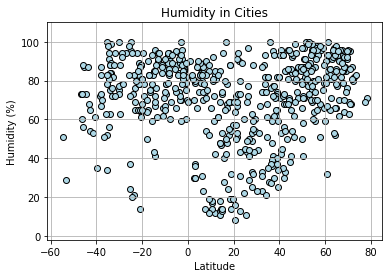

In [10]:
plt.scatter(cleancity_df["lat"],cleancity_df["humidity"], marker="o", color="lightblue",edgecolor="black")
plt.title("Humidity in Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(min(cleancity_df["humidity"])-10,max(cleancity_df["humidity"])+10)
plt.grid(True)



#printpng

plt.savefig("Humid_in_cities.png")



Humidity Observation: This verifies that there is no humidity above 100% in the data set.

## Latitude vs. Cloudiness Plot

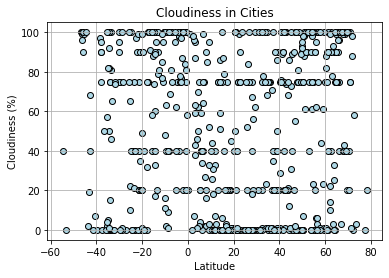

In [11]:
plt.scatter(cleancity_df["lat"],cleancity_df["cloudy"], marker="o", color="lightblue",edgecolor="black")
plt.title("Cloudiness in Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)



#printpng

plt.savefig("Cloudy_in_cities.png")


Observation of Cloudiness: This data shows that cloudiness is not determined by latitude. Cloudinees is pretty variable.

## Latitude vs. Wind Speed Plot

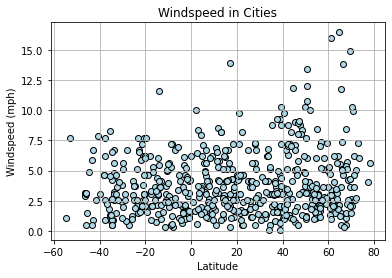

In [12]:
plt.scatter(cleancity_df["lat"],cleancity_df["windspeed"], marker="o", color="lightblue",edgecolor="black")
plt.title("Windspeed in Cities")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


#printpng

plt.savefig("Windy_in_cities.png")


Observation of Windspeed: Majority of the data suggest that latitude does not have an impact on windspeed. Its pretty simularly spread across with a few outliers.

## Linear Regression

In [13]:
northernhem=cleancity_df.loc[cleancity_df["lat"]>=0]
southernhem=cleancity_df.loc[cleancity_df["lat"]<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7741162985253358


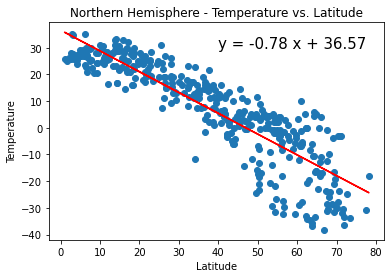

In [14]:
x_values = northernhem["lat"]
y_values = northernhem["temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15)
plt.title("Northern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.371610378221086


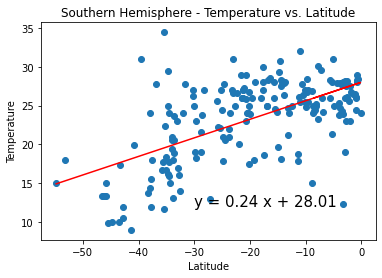

In [15]:
x_values = southernhem["lat"]
y_values = southernhem["temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,12),fontsize=15)
plt.title("Southern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

Observation of Temperature:

Northern r-squared = 0.74
Southern r-squared = 0.11

There is a strong correlation between temperature and lattitude for the northern hemisphere. For the southern hemisphere the r-squared value suggest there is little to no correlation between temperature and lattitude.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15162646154333229


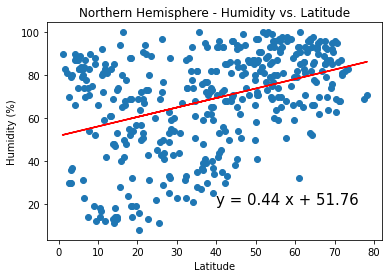

In [16]:
x_values = northernhem["lat"]
y_values = northernhem["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15)
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.053851246188992265


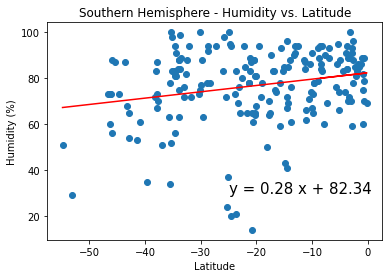

In [17]:
x_values = southernhem["lat"]
y_values = southernhem["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15)
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()


Observation of Humidity


Northern r-squared = 0.11
Southern r-squared = 0.06

Both the northern and southern hemisphere r-squared values suggest there is little to no correlation between humidity and lattitude.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07204968178588181


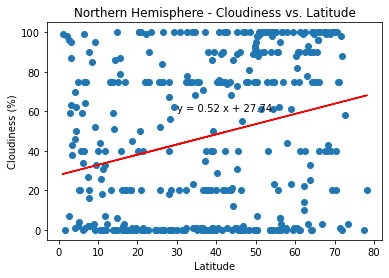

In [18]:
x_values = northernhem["lat"]
y_values = northernhem["cloudy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,60),fontsize=10)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05502010325787855


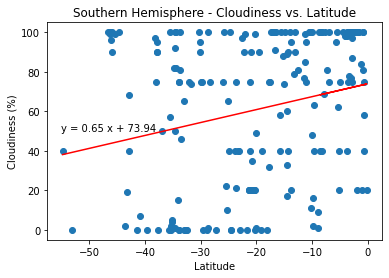

In [19]:
x_values = southernhem["lat"]
y_values = southernhem["cloudy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=10)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

Observation of Cloudiness

Northern r-squared = 0.11
Southern r-squared = 0.08

Both the northern and southern hemisphere r-squared values suggest there is little to no correlation between cloudiness and lattitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008341262995087088


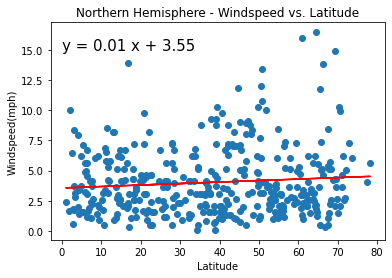

In [20]:
x_values = northernhem["lat"]
y_values = northernhem["windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15)
plt.title("Northern Hemisphere - Windspeed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed(mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0032922581396943188


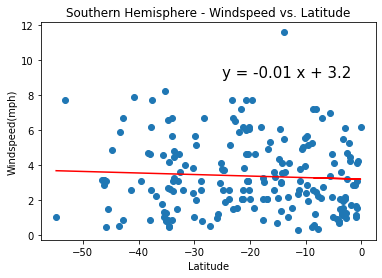

In [21]:
x_values = southernhem["lat"]
y_values = southernhem["windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,9),fontsize=15)
plt.title("Southern Hemisphere - Windspeed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed(mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

Observation of Windspeed

Northern r-squared = 0.01
Southern r-squared = 0.07

Both the northern and southern hemisphere r-squared values suggest there is little to no correlation between windspeed and lattitude.